# Computer Vision - P3

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 30th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


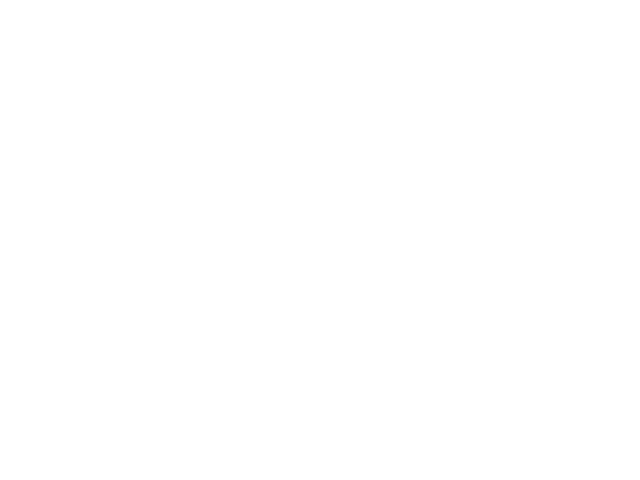

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [1]:
import numpy as np
import skimage
from skimage import io
import skimage.exposure as ex
import skimage.filters as f
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage import img_as_float



ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)

(2 points) a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. 

Execute the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 


**Hint:**
- If you need to convert the image to float, the command is: img_as_float()

- If you need the histogram, it is in skimage.exposure


<IPython.core.display.Javascript object>


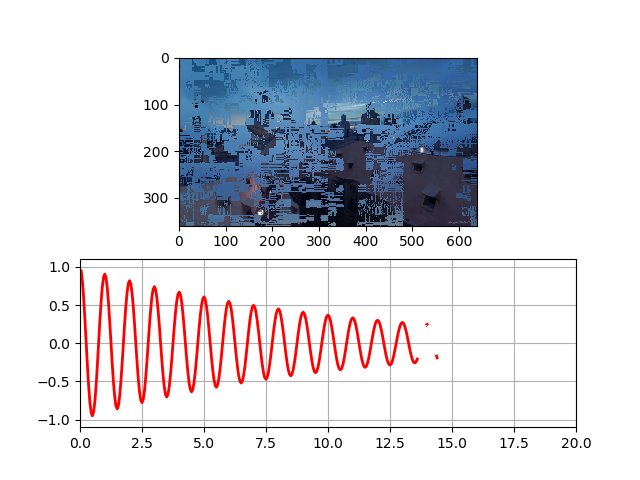

In [4]:
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


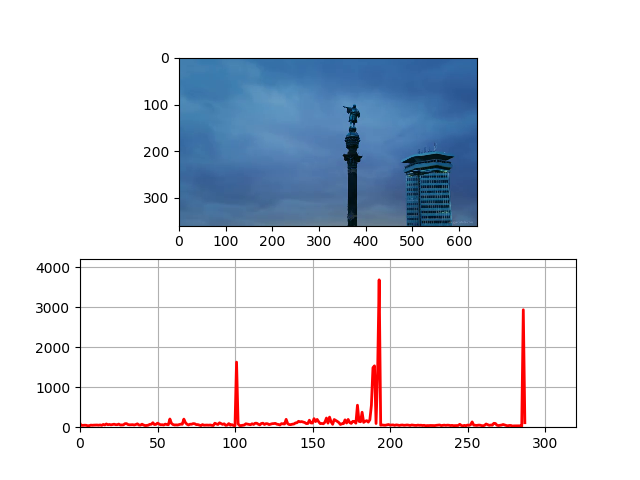

In [13]:
# %matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 4200)
ax2.set_xlim(0, 20)
ax2.grid()

diff_data = []
shots = [0]

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t = data
    xdata.append(t) # time = x axis
    if len(xdata):
        y = calculate_y(ic[len(xdata) - 1], ic[len(xdata)])
    else:
        y = 0
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

# Function to calculate the difference between two images
def calculate_y(image1, image2):
    # The two images are loaded
    hist1 = ex.histogram(img_as_float(image1))[0]
    hist2 = ex.histogram(img_as_float(image2))[0]
    
    # The difference is computed
    diff = hist1 - hist2
    
    # The MAE (Mean Absolute Error) is calculated
    mae = 0
    for i in diff:
        mae += abs(i)
    diff_data.append(mae/len(diff))
    
    # If the difference is bigger than 1600, a new frame is computed
    if mae/len(diff) > 1600:
        shots.append(len(xdata)-1)
        shots.append(len(xdata))
    return mae/len(diff)
    
        
ani = animation.FuncAnimation(fig, run, blit=False, interval=5, repeat=False, frames=500)
plt.show()

In [17]:
shots

# shots = [0, 102, 103, 194, 195, 287, 288]

(0.5 points) b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


<IPython.core.display.Javascript object>


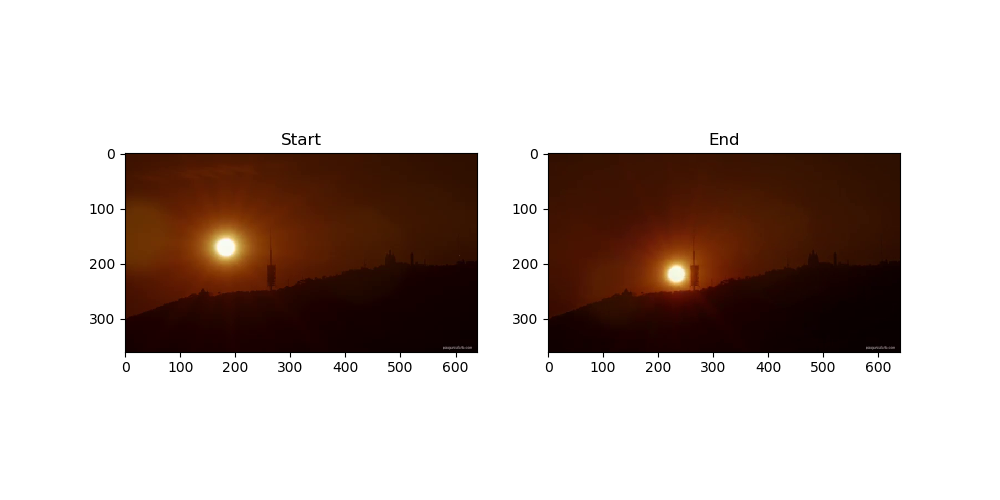

<IPython.core.display.Javascript object>


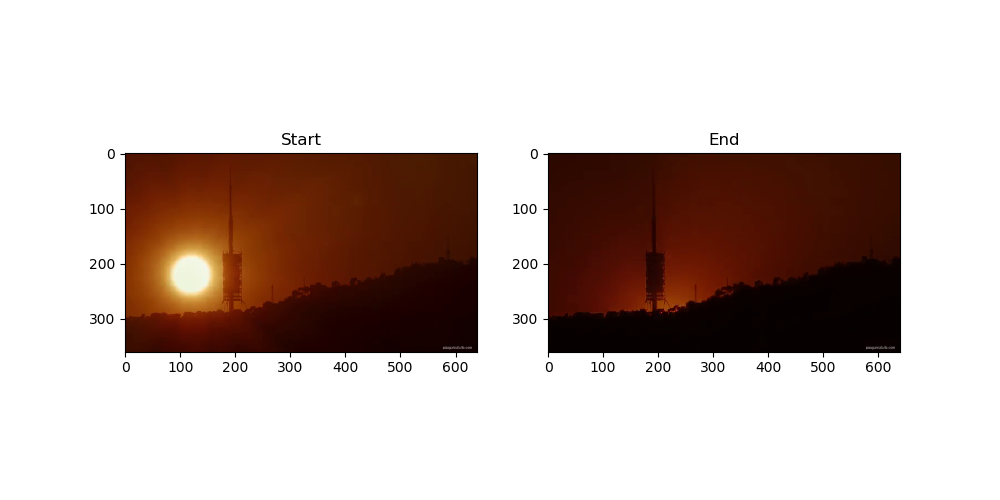

<IPython.core.display.Javascript object>


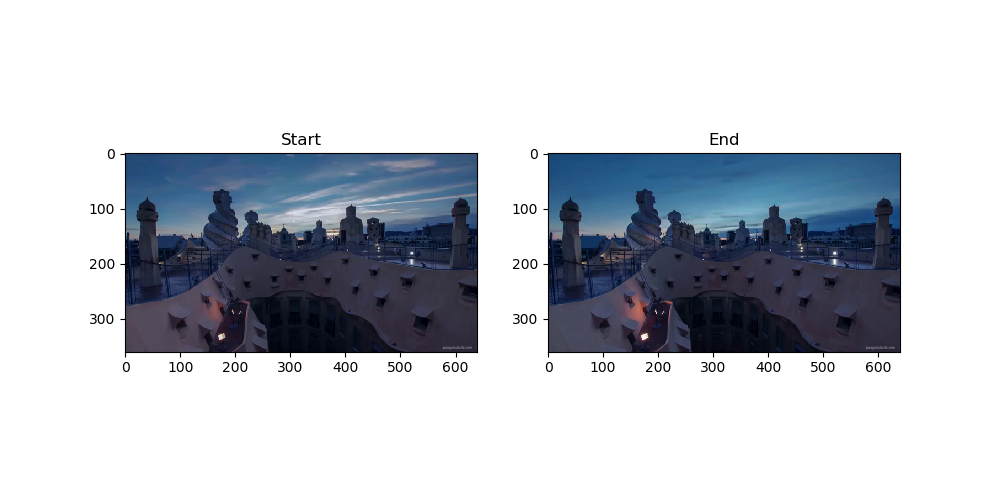

<IPython.core.display.Javascript object>


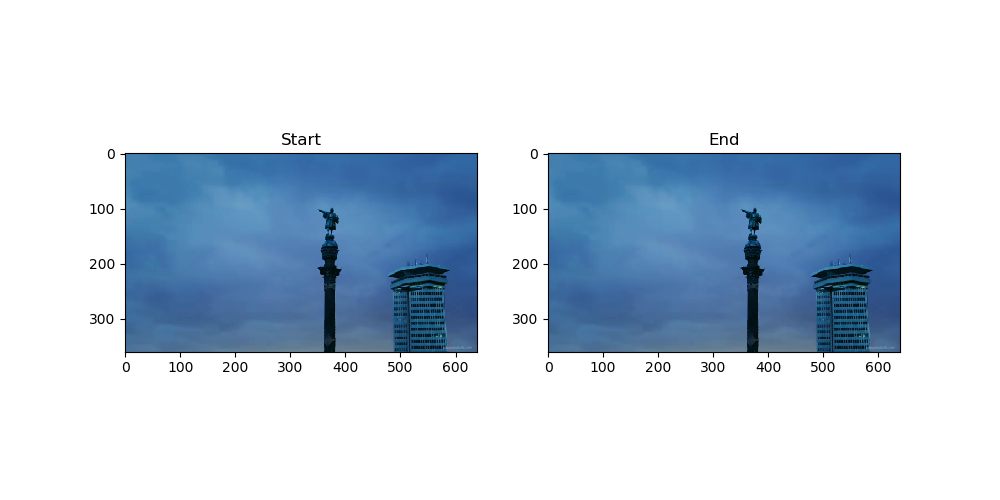

In [18]:
# Variable to check if it is a shot change
show = True

# We add the last image 
shots.append(288)

# For every shot change
for i in range(len(shots)):
    
    # If it has to be shown
    if show:
        # The structure for the subplots is created
        f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(10,5))

        # The first image settings are defined
        axarr[0].imshow(ic[shots[i]])
        axarr[0].set_title('Start')

        # The second image settings are defined
        axarr[1].imshow(ic[shots[i+1]])
        axarr[1].set_title('End')

        # The image is shown
        plt.show()
    
    # The next iteration is the opposite of this one
    show = not show

(0.5 points) c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [ ]:
To calculate the distance of the two images we have calculated their MAE (mean absolute error) of every pixel.

## 3.2 Background substraction

(2) a) Apply the background substraction algorithm (check theory material).

Visualize, for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

<IPython.core.display.Javascript object>


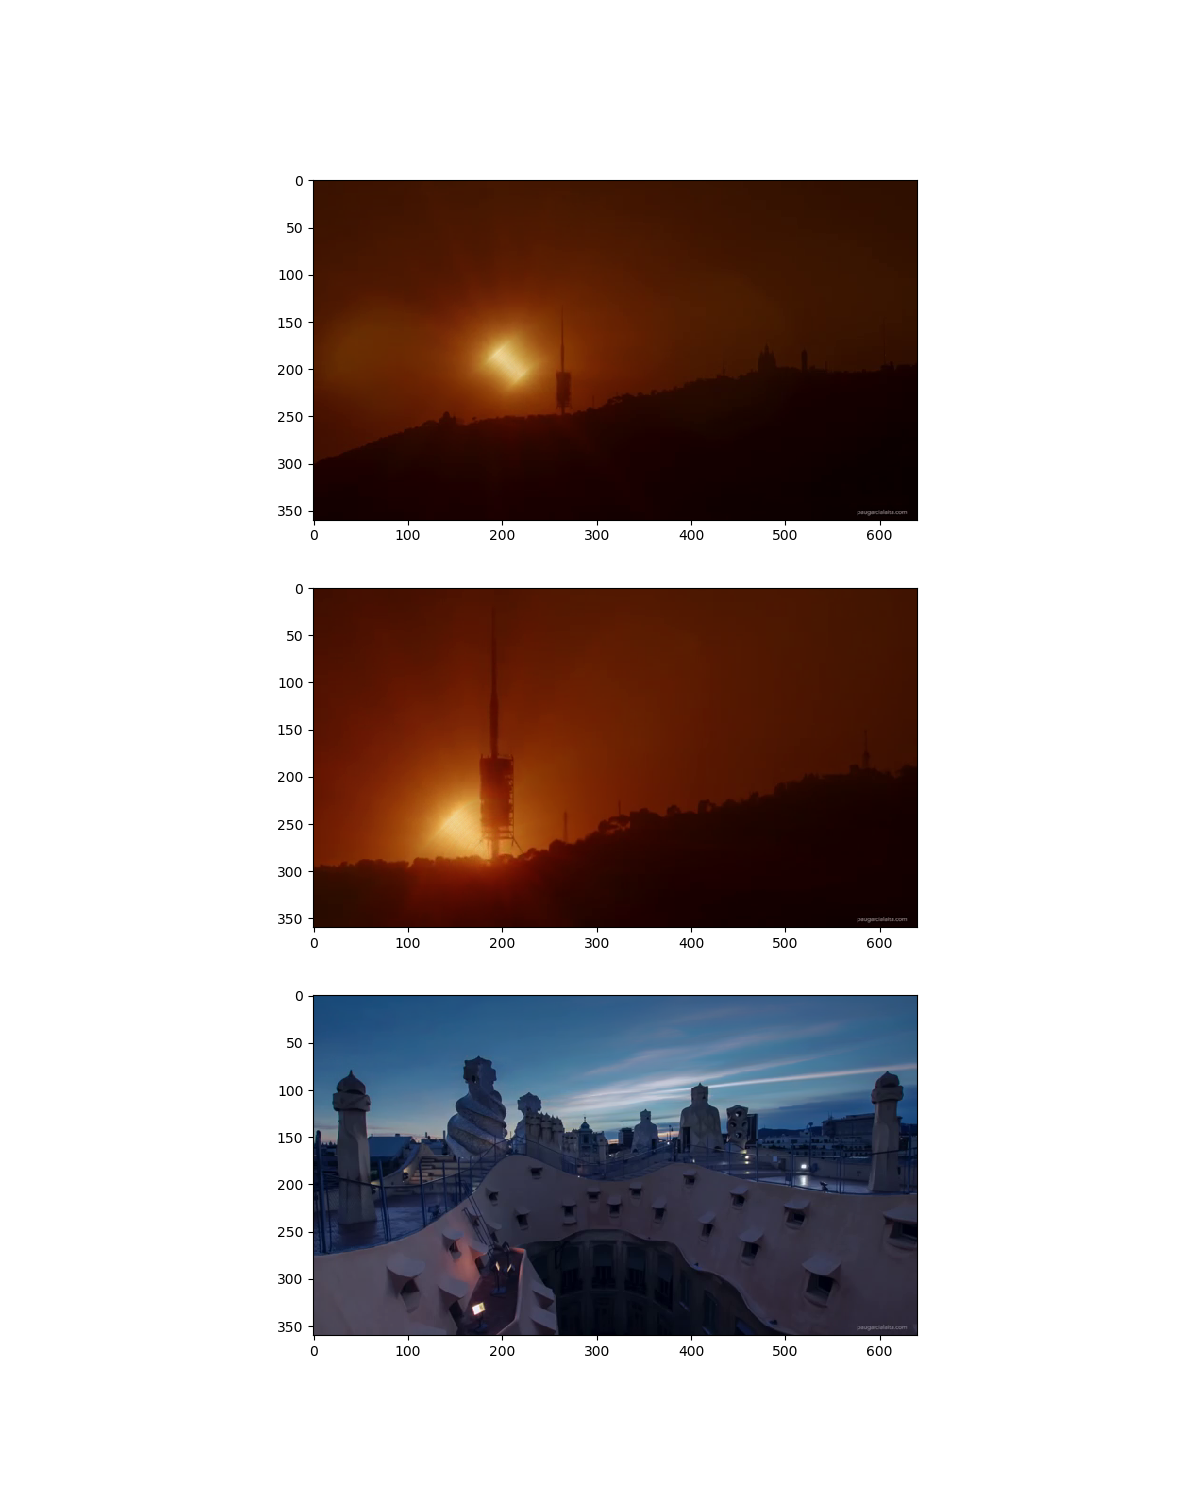

In [19]:
# Array of backgrounds
back = []

# Subplots structure created
f, axarr = plt.subplots(ncols=1, nrows=3,figsize=(12,15))

# For every shot
for shot in range(3):
    
    # The length is computed
    length = shots[2*shot+1] - shots[2*shot]
    
    # A 4D array with all the images of the shot is created as zero
    a = list(ic[0].shape)
    a.append(length)
    total = np.zeros(a)

    # The 4D array is filled with the images
    for i in range(length):
        total[:,:,:,i] = ic[i + shots[2*shot]]
    background = np.zeros(ic[0].shape) 
    
    # The median of the 4D array is computed through the temporal variable
    background = np.median(total, axis=3)
    
    # The background is saved in the backgrounds array
    back.append(background)
    
    # The background is shown
    axarr[shot].imshow(background/255)

plt.show()

<IPython.core.display.Javascript object>


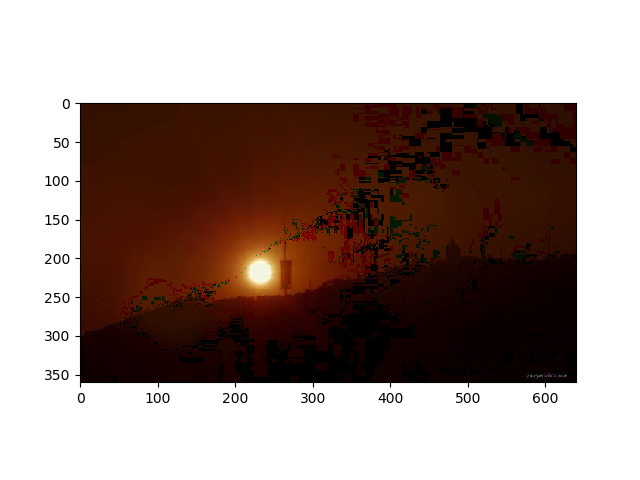

In [69]:
# Shot 1

# The start and end are defined
inici = shots[0]
final = shots[1]
fig = plt.figure()  # Create figure

# The difference of background and the frame is computed
resta = ic[inici] - back[0]

# Where it is zero, we define a zero in the frame image
to_show = resta[:,:,:] != 0
copia = ic[inici].copy()
copia[np.invert(to_show)] = 0
im = plt.imshow(copia, animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    
    # The same process is done to every frame
    resta = ic[i] - back[0]
    to_show = resta[:,:,:] != 0
    copia = ic[i].copy()
    copia[np.invert(to_show)] = 0
    im.set_array(copia) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=final-inici, repeat= False)

<IPython.core.display.Javascript object>


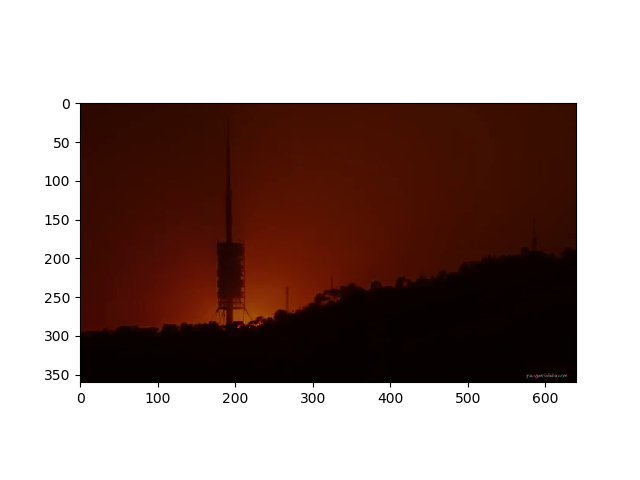

In [70]:
# Shot 2

# The start and end are defined
inici = shots[2]
final = shots[3]
fig = plt.figure()  # Create figure

# The difference of background and the frame is computed
resta = ic[inici] - back[1]

# Where it is zero, we define a zero in the frame image
to_show = resta[:,:,:] != 0
copia = ic[inici].copy()
copia[np.invert(to_show)] = 0
im = plt.imshow(copia, animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    
    # The same process is done to every frame
    resta = ic[inici + i] - back[1]
    to_show = resta[:,:,:] != 0
    copia = ic[i + inici].copy()
    copia[np.invert(to_show)] = 0
    im.set_array(copia) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=final-inici, repeat= False)

<IPython.core.display.Javascript object>


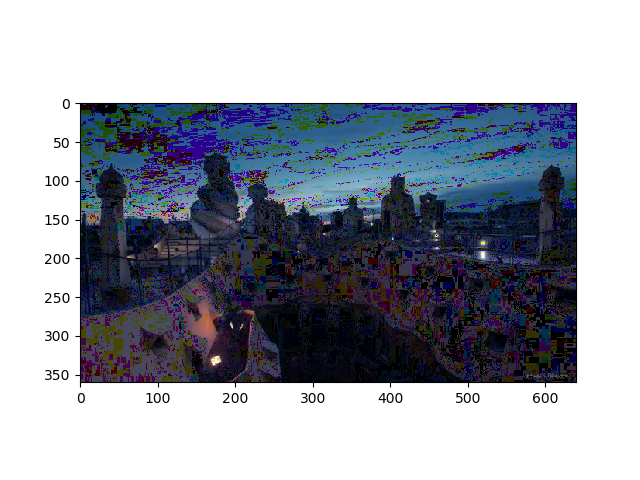

In [68]:
# Shot 3

# The start and end are defined
inici = shots[4]
final = shots[5]
fig = plt.figure()  # Create figure

# The difference of background and the frame is computed
resta = ic[inici] - back[2]

# Where it is zero, we define a zero in the frame image
to_show = resta[:,:,:] != 0
copia = ic[inici].copy()
copia[np.invert(to_show)] = 0
im = plt.imshow(copia, animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    
    # The same process is done to every frame
    resta = ic[inici + i] - back[2]
    to_show = resta[:,:,:] != 0
    copia = ic[i + inici].copy()
    copia[np.invert(to_show)] = 0
    im.set_array(copia) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=final-inici, repeat= False)

(0.2 points) - What happens if the shots are not correctly extracted? 



In [ ]:
"""
You can get the mean between pictures that are not in the same frame and 
as a result you get kind of an Hybrid photo
"""

(0.2 points) - What happens if you find too many shots in the video? 

In [ ]:
"""
If you find too many shots that divide the video the result will be 
worse as you'll have less shots to extract the median from
"""

(0.3 points) - What do the static background images represent? 

In [ ]:
"""
They represent the part of the image that doesn't change throug time
"""

(0.2 points) - In which situations does the algorithm work and in which it does not? 


In [ ]:
"""
I will work as long as the camera is static and there are no big changes in ilumination
"""

(0.2 points) - What happens if you substract the background image from the original one?

In [ ]:
"""
You get the variation between the original and the background in essenge you get 
just the foreground minus the background. It looks like a "negative" of the foreground
"""

(0.2 points) - Do you see any additional application for this algorithm?

In [ ]:
'''
We can think of the following applications:
    - Tourist removal
    - Noise reduction
    - Video surveillance
'''

(0.5) **[OPTIONAL]**
Apply the algorithm to some other static video that you found.

## 3.3 Clustering methods on the RGB-XY space

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

(0.3 points) a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. 


<IPython.core.display.Javascript object>


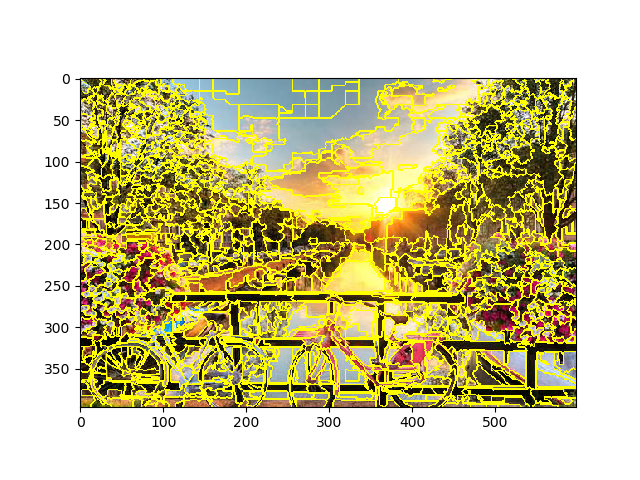

In [6]:
# The image is loaded
img = io.imread('images/amsterdam.jpg')

# The felzenswalb segmentation is done and applied to the image
segments_fz = seg.felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
plt.imshow(seg.mark_boundaries(img, segments_fz))
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation.  Which are the optimal values?

<IPython.core.display.Javascript object>


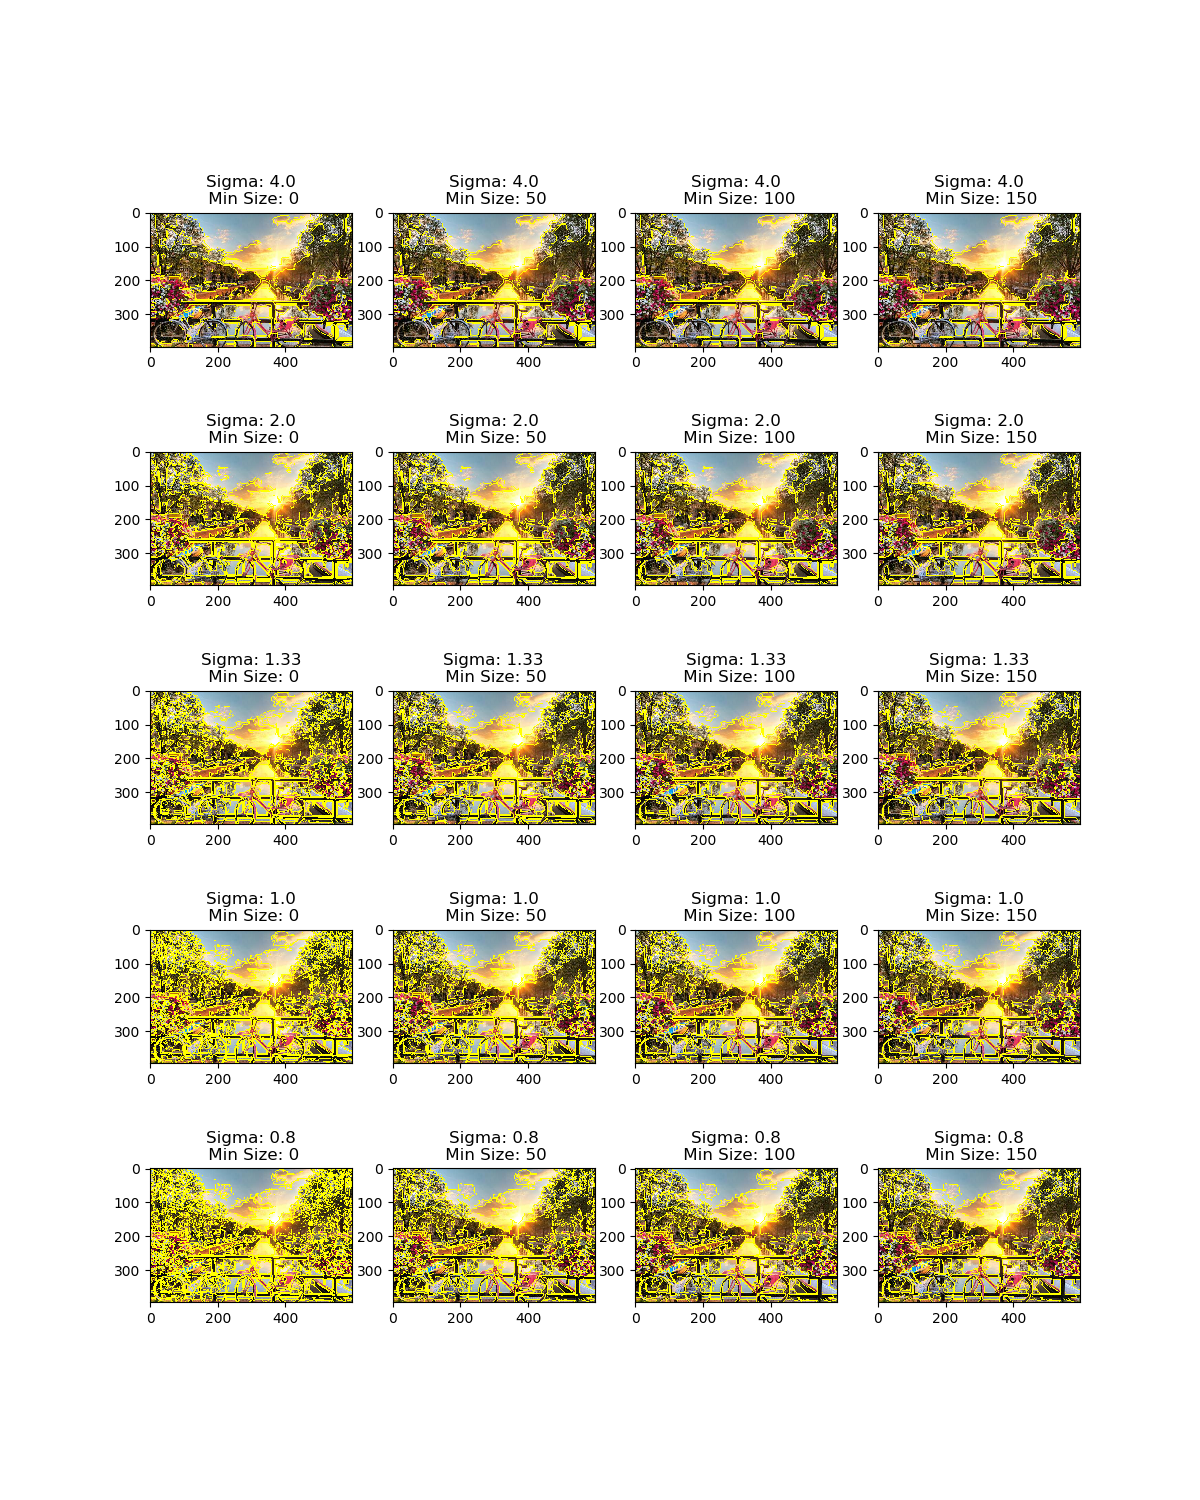

The optimal values seem to be Sigma = 0.8, scale = 150 and Min Size = 100


In [12]:
# The image is loaded
img = io.imread('images/amsterdam.jpg')

# The subplots are defined
f, axarr = plt.subplots(ncols=4, nrows=5,figsize=(12,15))

# i changes the sigma value
for i in range(5):
    
    # j changes the min_size value
    for j in range(4):
        
        # The segmentation is applied
        imge = seg.felzenszwalb(img, scale=150, sigma=4/(i+1), min_size=j*50)
        
        # The first image settings are defined
        axarr[i][j].imshow(seg.mark_boundaries(img, imge))
        axarr[i][j].set_title('Sigma: ' + str(round(4/(i+1), 2)) + "\n Min Size: "+  str(j*50))
        
plt.show()
print("The optimal values seem to be Sigma = 0.8, scale = 150 and Min Size = 100")

(0.3 points) - How does each parameter behave?

In [ ]:
"""
Sigma is the width of a Gaussian kernel, used for smoothing the image prior to segmentation, 
as we can see the smaller the sigma the more detailed the segmentation is
"""

(0.2 points) - Comment what algorithm is the method based in up to 3 lines most.

In [ ]:
"""
This method is based on agglomerative clustering which iteratively merges 
the closest two clusters until some criteria is met
"""

(0.3 points) b) Segment the previous image using SLIC algorithm. 

<IPython.core.display.Javascript object>


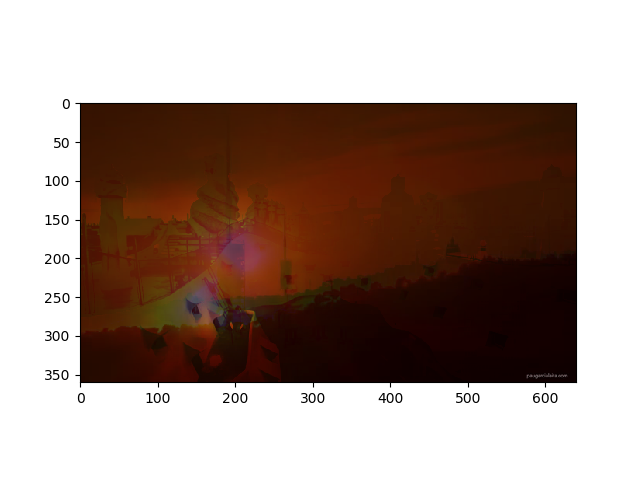

In [13]:
# The image is loaded
img = io.imread('images/amsterdam.jpg')

# The SLIC segmentation is applied and shown
imeg = seg.slic(img)
plt.imshow(seg.mark_boundaries(img, imeg))
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation. Up to your opinion, which are the optimal values? 


<IPython.core.display.Javascript object>


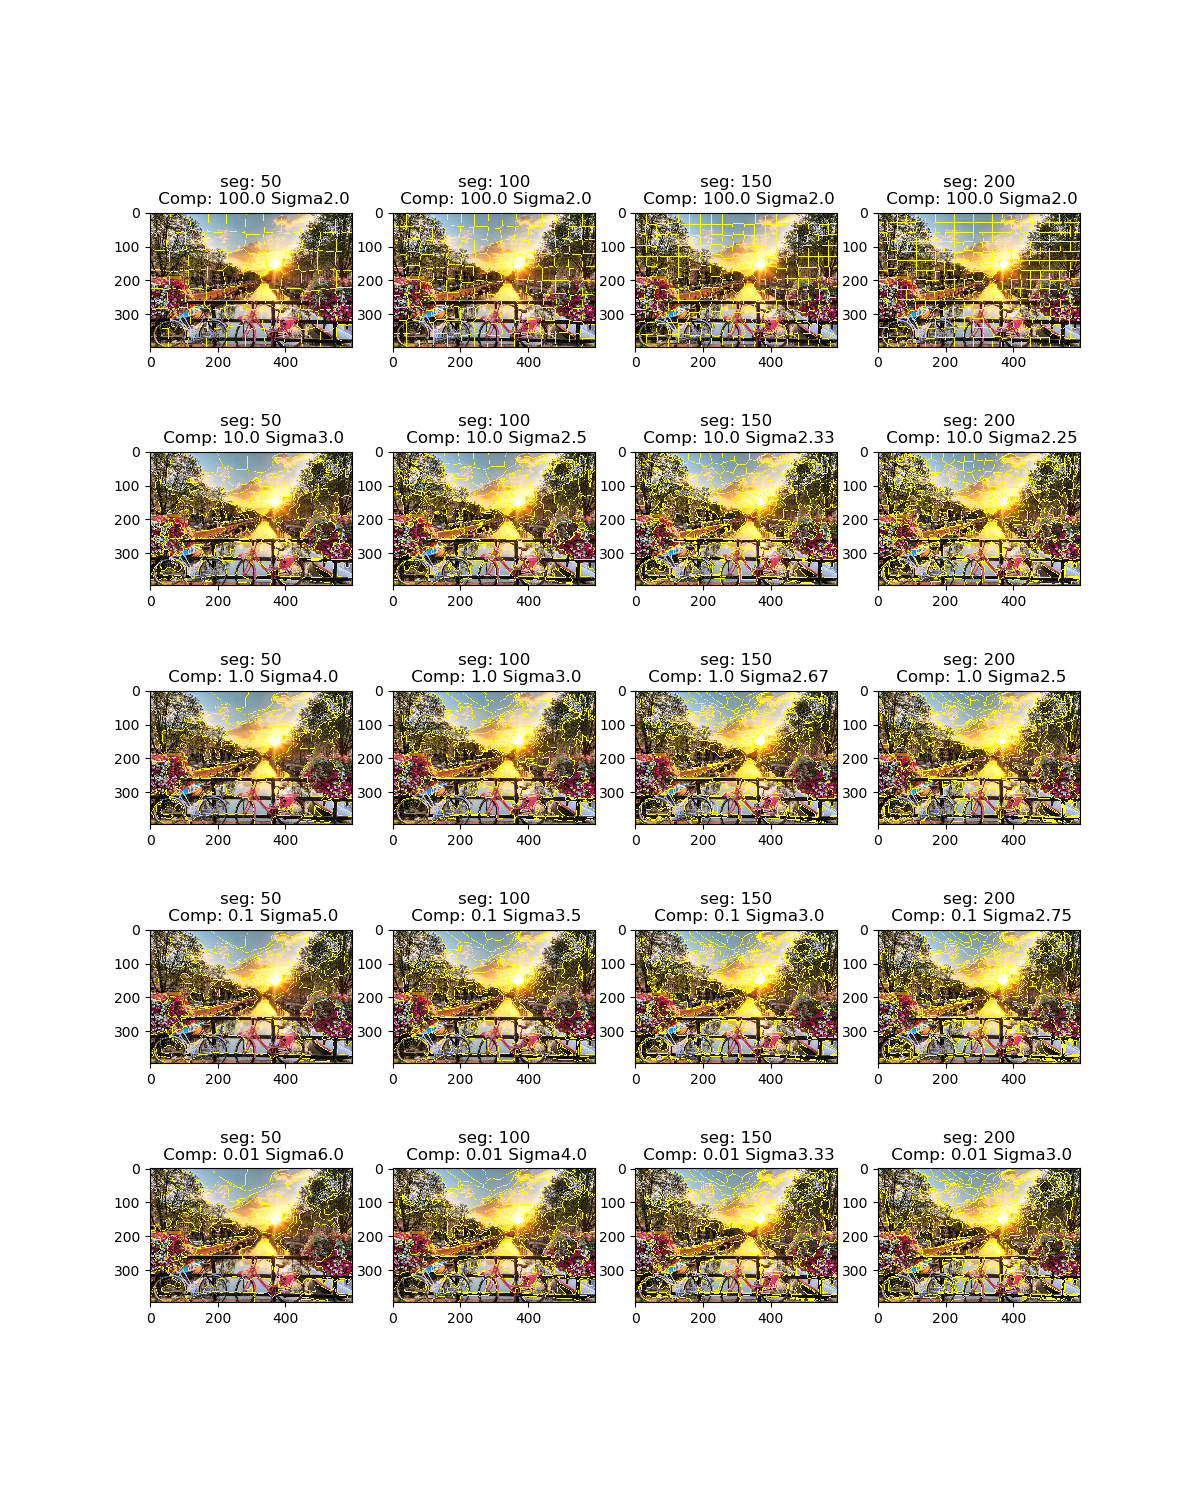

The optimal values seem to be Sigma = 0.8, scale = 150 and Min Size = 100


In [22]:
# The image is loaded
img = io.imread('images/amsterdam.jpg')

# The structure for the subplots is created
f, axarr = plt.subplots(ncols=4, nrows=5,figsize=(12,15))

# i changes the compactness from 100 to 0.01 (log-scale)
for i in range(5):
    
    # j changes the number of segments
    for j in range(4):
        
        # The segmentation is applied
        imge = seg.slic(img, n_segments=75*(j+1), compactness=100*(0.1**i), sigma=2 + i/(j+1))
        
        # The first image settings are defined
        axarr[i][j].imshow(seg.mark_boundaries(img, imge))
        axarr[i][j].set_title('seg: ' + str(75*(j+1)) + "\n Comp: "+  str(round(100*(0.1**i),2)) + " Sigma" + str(round(2 + i/(j+1),2)))
        
plt.show()
print("The optimal values seem to be Sigma = 5, compactness = 0.1 and Segments = 75")

(0.3 points) - How does each parameter behave? 


In [ ]:
"""
Segments indicates the number of segments that the algorithm ends at, sigma is again the 
smoothing parameter and works as in the felzenszwalb method and compactness gives more weight 
to proximity making the clusters more square-like
"""

(0.2 points) - Comment what algorithm is the method based in up to 3 lines.

In [ ]:
"""
This method is based on the K-means algorithm that seeds
random points in the image and uses distance methods to cluster 
them and the surrounding pixels together
"""

(0.3 points) c) Plot the original image and the results of both algorithms in a 1x3 subplot. 



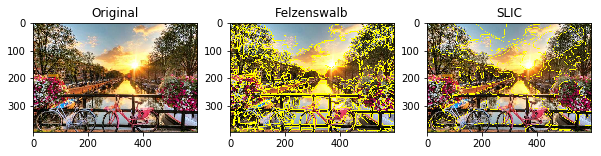

In [2]:
# The image is loaded
img = io.imread('images/amsterdam.jpg')

# The structure for the subplots is created
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(10,5))

# The two segmentations are created
img1 = seg.felzenszwalb(img, scale=150, sigma=0.8, min_size=100)
img2 = seg.slic(img, n_segments=75, compactness=0.1, sigma=5)

# The first image settings are defined
axarr[0].imshow(img)
axarr[0].set_title('Original')

# The second image settings are defined
axarr[1].imshow(seg.mark_boundaries(img, img1))
axarr[1].set_title('Felzenswalb')

# The third image settings are defined
axarr[2].imshow(seg.mark_boundaries(img, img2))
axarr[2].set_title('SLIC')

plt.show()

(0.4 points) d) Calculate also the number of segments obtained on the image by each of the algorithms. 

In [ ]:
Original = 1 segment
Felzenswalb = len(np.unique(img1))
SLIC = len(np.unique(img2))

(0.4 points) e) Comment the differences between each method as well as their advantages and disadvantages.

In [ ]:
"""
The methods work as explained previously and both have pros and cons: 
    - Agglomerative clustering: it is very simple but you have to choose 
      the metric you use, you need to know when to stop and it
      gives no information about pixel distribution 
    - K-means : very simple too and converges to a local minimum but memory
      intensive, sensitive to initialization and outliers and only finds "spherical" clusters    
"""